# Import Package

In [1]:
%matplotlib inline
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from keras.models import Model
from keras.layers import Input, Reshape
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import UpSampling1D, Conv1D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Reading Data

In [2]:
real_data = pd.read_csv("../data/S2_train_testlist_8Fe_cos_quanbian+avgvar.csv")
real_data = real_data.replace(np.nan, 0)
# XT = real_data.sample(n=200)

In [3]:
real_data

,sign,Card--Type,Card--Time,Card--Money,Card--Shop,Card--Ip,Card--Place,Card--Lastcheck,Type--Time,Type--Money,...,Money--Place,Money--Lastcheck,Ip--Shop,Shop--Place,Shop--Lastcheck,Ip--Place,Ip--Lastcheck,Place--Lastcheck,avg,var
0,0,-0.042399,0.063695,0.017896,0.000000,0.010995,-0.111221,0.090428,-0.043828,-0.248271,...,-0.218951,0.043444,0.000000,0.000000,0.000000,0.050473,-0.207883,-0.067844,-0.023203,0.010692
1,0,-0.011109,-0.123187,-0.099985,0.000000,-0.104191,0.007368,-0.018701,0.034485,-0.050140,...,-0.167611,0.043444,0.000000,0.000000,0.000000,0.215010,-0.207883,-0.121112,-0.020758,0.011819
2,0,-0.140678,0.178591,-0.112425,0.000000,-0.017335,-0.026141,0.076011,-0.065923,-0.057866,...,-0.073848,-0.112205,0.000000,0.000000,0.000000,-0.022169,0.162474,-0.053887,0.008968,0.010728
3,0,-0.183661,0.000406,-0.019037,0.000000,0.130369,0.097535,-0.008357,-0.043828,-0.248271,...,-0.218951,0.043444,0.000000,0.000000,0.000000,0.050473,-0.207883,-0.067844,-0.023781,0.012276
4,0,-0.009977,0.109537,0.035912,0.000000,-0.062065,-0.216283,0.058846,0.120247,-0.008989,...,-0.087160,-0.112205,0.000000,0.000000,0.000000,0.077944,-0.207883,-0.087800,-0.000872,0.012841
5,0,-0.016707,0.092801,0.003397,0.000000,-0.073302,-0.025838,0.074540,-0.000539,0.051033,...,-0.044231,0.043444,0.000000,0.000000,0.000000,-0.003578,0.162474,-0.088500,-0.009491,0.007725
6,0,0.000387,0.026169,0.040990,0.000000,-0.126316,0.140357,-0.122887,0.048362,0.051033,...,-0.177894,0.043444,0.000000,0.000000,0.000000,-0.066072,0.162474,-0.010276,0.013707,0.010839
7,0,0.095138,-0.064043,-0.196627,0.000000,0.017759,0.030556,-0.068340,-0.043828,-0.248271,...,-0.218951,0.043444,0.000000,0.000000,0.000000,0.050473,-0.207883,-0.067844,-0.033438,0.011583
8,0,0.051600,0.106776,0.091981,-0.158218,-0.039809,0.084892,-0.029712,0.023348,-0.248271,...,-0.011665,0.043444,-0.132146,-0.005229,0.024965,-0.065383,0.162474,-0.060690,0.003261,0.010158
9,0,0.070016,0.088286,-0.164905,-0.106997,0.055252,-0.134583,0.018199,0.042918,-0.144887,...,-0.052378,0.040375,0.020457,0.098878,-0.032310,-0.059282,-0.207883,0.020803,-0.013662,0.008949


In [4]:
real_data.columns

Index(['sign', 'Card--Type', 'Card--Time', 'Card--Money', 'Card--Shop',
       'Card--Ip', 'Card--Place', 'Card--Lastcheck', 'Type--Time',
       'Type--Money', 'Type--Shop', 'Type--IP', 'Type--Place',
       'Type--Lastcheck', 'Time--Money', 'Time--Shop', 'Time--Ip',
       'Time--Place', 'Time--Lastcheck', 'Money--Shop', 'Money--Ip',
       'Money--Place', 'Money--Lastcheck', 'Ip--Shop', 'Shop--Place',
       'Shop--Lastcheck', 'Ip--Place', 'Ip--Lastcheck', 'Place--Lastcheck',
       'avg', 'var'],
      dtype='object')

In [5]:
len(real_data[real_data["sign"]==0])

2393817

# Sampling

In [8]:
real_data_sample = real_data[real_data["sign"]==0]
real_data_sample = real_data_sample.append(real_data[real_data["sign"]==1].sample(frac = 0.075))
len(real_data_sample[real_data_sample["sign"]==0])/len(real_data_sample[real_data_sample["sign"]==1])
real_data_sample_t = real_data_sample[real_data_sample["sign"]==1]
len(real_data_sample_t)


790.2994387586663

3029

In [9]:
%time real_data_sample.to_csv("../data/train_1-800.csv", index=False)

Wall time: 1min 44s


# Generative and Discriminative models

In [1]:
#生成模型
n = 3000
def get_generative(G_in, lr=1e-3):
    x = Dense(200)(G_in)
    x = Activation('tanh')(x)
    G_out = Dense(30, activation='tanh')(x)
    G = Model(G_in, G_out)
    opt = SGD(lr=lr)
    G.compile(loss='binary_crossentropy', optimizer=opt)
    return G, G_out

#判别模型d1
def get_discriminative1(D1_in, lr=1e-3, drate = .25, n_channels=100, conv_sz=30, leak=.2):
    x = Reshape((-1, 1))(D1_in)
    x = Conv1D(n_channels, conv_sz, activation='relu')(x)
    x = Dropout(drate)(x)
    x = Flatten()(x)
    x = Dense(n_channels)(x)
    D1_out = Dense(2, activation='sigmoid')(x)
    D1 = Model(D1_in, D1_out)
    dopt = Adam(lr=lr)
    D1.compile(loss='binary_crossentropy', optimizer=dopt)
    
    return D1, D1_out

#判别模型d2
def get_discriminative2(D2_in, lr=1e-3, drate = .25, n_channels=100, conv_sz=30, leak=.2):
    x = Reshape((-1, 1))(D2_in)
    x = Conv1D(n_channels, conv_sz, activation='relu')(x)
    x = Dropout(drate)(x)
    x = Flatten()(x)
    x = Dense(n_channels)(x)
    D2_out = Dense(2, activation='sigmoid')(x)
    D2 = Model(D2_in, D2_out)
    dopt = Adam(lr=lr)
    D2.compile(loss='binary_crossentropy', optimizer=dopt)
    
    return D2, D2_out

In [2]:
G_in = Input(shape=(30,))
G, G_out = get_generative(G_in)
G.summary()

D1_in = Input(shape=[30])
D1, D1_out = get_discriminative1(D1_in)
D1.summary()

D2_in = Input(shape=[30])
D2, D2_out = get_discriminative2(D2_in)
D2.summary()

NameError: name 'Input' is not defined

In [20]:
def set_trainability(model, trainable=False):
    model.trainable = trainable
    for layer in model.layers:
        layer.trainable = trainable
        
def make_gan(GAN_in, G, D1, D2):
    set_trainability(D1, False)
    x = G(GAN_in)
    GAN_out = D1(x)
    set_trainability(D2, False)
    x = G(GAN_in)
    GAN_out = D2(x)
    GAN = Model(GAN_in, GAN_out)
    GAN.compile(loss='binary_crossentropy', optimizer=G.optimizer)
    return GAN, GAN_out


In [21]:
def sample_data_and_gen(G, noise_dim=30, n_samples=n):
    XT = real_data_sample_t.sample(n=n_samples)
    XT = np.array(XT)
    XT = XT[:, 1:XT.shape[1]]
    XN_noise = np.random.uniform(-1, 1, size=[XT.shape[0], XT.shape[1]])
    XN = G.predict(XN_noise)
    X = np.concatenate((XT, XN))
    y = np.zeros((2*XT.shape[0], 2))
    y[:XT.shape[0], 1] = 1
    y[XT.shape[0]:, 0] = 1
    
    return X, y

In [22]:
def pretrain(G, D1, D2, batch_size=32):
    X, y = sample_data_and_gen(G)
    set_trainability(D1, True)
    D1.fit(X, y, epochs=1, batch_size=batch_size)
    X, y = sample_data_and_gen(G)
    set_trainability(D2, True)
    D2.fit(X, y, epochs=1, batch_size=batch_size)

In [23]:
def sample_noise(G, noise_dim=30, n_samples=n):
    X = np.random.uniform(0, 1, size=[n_samples, noise_dim])
    y = np.zeros((n_samples, 2))
    y[:, 1] = 1

    return X, y

In [24]:
def train(GAN, G, D1, D2, epochs=50, n_samples=n, noise_dim=30, batch_size=32, verbose=False, v_freq=5):
    d1_loss = []
    g_loss = []
    d2_loss = []
    e_range = range(epochs)
    if verbose:
        e_range = tqdm(e_range)
    
    for epoch in e_range:
        X, y = sample_data_and_gen(G, n_samples=n_samples, noise_dim=noise_dim) # 对D1进行训练
        set_trainability(D1, True)
        d1_loss.append(D1.train_on_batch(X, y))
        
        X, y = sample_noise(G, n_samples=n_samples, noise_dim=noise_dim) # 对G训练
        set_trainability(D1, False)
        #g_loss.append(GAN.train_on_batch(X, y))
        
        X, y = sample_data_and_gen(G, n_samples=n_samples, noise_dim=noise_dim) # 对D1进行训练
        set_trainability(D2, True)
        d2_loss.append(D2.train_on_batch(X, y))
        
        X, y = sample_noise(G, n_samples=n_samples, noise_dim=noise_dim) # 对G训练
        set_trainability(D2, False)
        g_loss.append(GAN.train_on_batch(X, y))
        
        if verbose and (epoch + 1) % v_freq == 0:
            print("Epoch #{}: Generative Loss: {}, Discriminative Loss: {}".format(epoch + 1, g_loss[-1], d1_loss[-1], d2_loss[-1]))
            
    return d1_loss, d2_loss, g_loss

# Train

In [25]:
pretrain(G, D1, D2)

Epoch 1/1
6000/6000 [==============================] - ETA: 4:53 - loss: 0.697 - ETA: 23s - loss: 0.680 - ETA: 12s - loss: 0.65 - ETA: 7s - loss: 0.6264 - ETA: 5s - loss: 0.584 - ETA: 4s - loss: 0.536 - ETA: 3s - loss: 0.472 - ETA: 2s - loss: 0.415 - ETA: 1s - loss: 0.372 - ETA: 1s - loss: 0.332 - ETA: 1s - loss: 0.300 - ETA: 0s - loss: 0.275 - ETA: 0s - loss: 0.252 - ETA: 0s - loss: 0.232 - ETA: 0s - loss: 0.217 - 2s 387us/step - loss: 0.2088


In [26]:
GAN_in = Input(shape=[30])
GAN, GAN_out = make_gan(GAN_in, G, D1, D2)
GAN.summary()
d_loss, g_loss = train(GAN, G, D1, D2, verbose=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 30)                0         
_________________________________________________________________
model_3 (Model)              (None, 30)                12230     
_________________________________________________________________
model_4 (Model)              (None, 2)                 13402     
Total params: 25,632
Trainable params: 12,230
Non-trainable params: 13,402
_________________________________________________________________


Epoch #5: Generative Loss: 0.18724308907985687, Discriminative Loss: 0.04746584966778755
Epoch #10: Generative Loss: 0.16281966865062714, Discriminative Loss: 0.044032786041498184
Epoch #15: Generative Loss: 0.17850832641124725, Discriminative Loss: 0.04741469398140907
Epoch #20: Generative Loss: 0.16955158114433289, Discriminative Loss: 0.04884358122944832
Epoch #25: Generative Loss: 0.12814085185527802, Discriminative Loss: 0.0462593175470829
Epoch #30: Generative Loss: 0.10932796448469162, Discriminative Loss: 0.04382513463497162
Epoch #35: Generative Loss: 0.10166648030281067, Discriminative Loss: 0.03974548354744911
Epoch #40: Generative Loss: 0.1551005095243454, Discriminative Loss: 0.033206965774297714
Epoch #45: Generative Loss: 0.18409277498722076, Discriminative Loss: 0.03754066303372383
Epoch #50: Generative Loss: 0.22041742503643036, Discriminative Loss: 0.03763072192668915



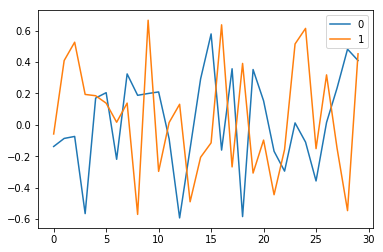

In [27]:
N_VIEWED_SAMPLES = 2
data_and_gen, _ = sample_data_and_gen(G, n_samples=N_VIEWED_SAMPLES)
pd.DataFrame(np.transpose(data_and_gen[N_VIEWED_SAMPLES:])).plot()

In [28]:
# data_and_gen
# _

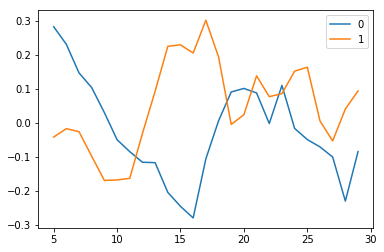

In [29]:
N_VIEWED_SAMPLES = 2
data_and_gen, _ = sample_data_and_gen(G, n_samples=N_VIEWED_SAMPLES)
pd.DataFrame(np.transpose(data_and_gen[N_VIEWED_SAMPLES:])).rolling(5).mean()[5:].plot()

In [ ]:
ax = pd.DataFrame(
    {
        'Generative Loss': g_loss,
        'Discriminative Loss': d_loss,
    }
).plot(title='Training loss', logy=True)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

Text(0.5,0,'Epochs')

Text(0,0.5,'Loss')

In [ ]:
XT = real_data_sample_t.sample(n)
XT = np.array(XT)
XT = XT[:, 1:XT.shape[1]]
XN_noise = np.random.uniform(-1, 1, size=[XT.shape[0], XT.shape[1]])
XN = G.predict(XN_noise)
XN.shape
XN

In [ ]:
r= np.array(real_data_sample[real_data_sample["sign"]==0])
y = np.ones((XT.shape[0], 1))
gen_data = np.concatenate([y, XN], axis=1)
rea_data =  np.concatenate([y, XT], axis=1)
gr_data = np.append(gen_data, rea_data, axis=0)
gr_data = np.append(gr_data, r, axis=0)
df = pd.DataFrame(gr_data)
len(df[df[0]==0])/len(df[df[0]==1])


In [ ]:
df.to_csv("../data/g_r_train_400_1.csv", index=False)